In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.append("/Users/gregoirelejay/dev/personal/tag_walk/tag_walk") 
# sys.path.append("/usr/local/lib/python2.7/site-packages")
print(sys.executable)
import fachung
import inferno.trainers

/usr/local/opt/python3/bin/python3.6


In [3]:
import torchvision.transforms as transforms
from fachung.datasets.tagwalk import TagwalkDataset

# BASE_DATA = '/Volumes/bobby/tag_walk/tag_walk/data/tag_walk/'
BASE_DATA = '../data/tag_walk/'

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

DEFAULT_TRANSFORMS = (
    transforms.Compose([
        transforms.RandomSizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize
    ])
)

tw_dataset = TagwalkDataset(
    csv_path=BASE_DATA + 'assocs.csv',
    img_path=BASE_DATA + 'images/all',
    transform=DEFAULT_TRANSFORMS
)

In [5]:
print(tw_dataset.num_classes)
tw_dataset[0][0].shape

655


torch.Size([3, 224, 224])

In [6]:
from fachung.datasets.tagwalk import tagwalk_dataloader
tw_dataloader = tagwalk_dataloader(tw_dataset)

In [7]:
tw_dataset[0][1].shape

torch.Size([655])

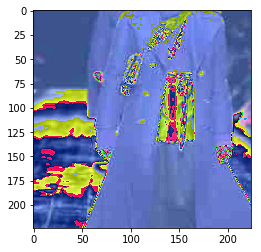

In [8]:
import torchvision
import matplotlib.pyplot as plt
import numpy as np

to_pl = transforms.ToPILImage()
plt.imshow(to_pl(tw_dataset[0][0]))

In [9]:
import torchvision
import torch.nn as nn
model = torchvision.models.resnet18(pretrained=True)
num_classes = tw_dataset.num_classes
model.fc = nn.Linear(model.fc.in_features, num_classes)

In [ ]:
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [ ]:
from torch.autograd import Variable
import torch.nn.functional as F

training_loader = tw_dataloader
def train(epoch):
    print "model.train"
    model.train()
    print "Batching..."
    for batch_idx, (data, target) in enumerate(training_loader):
        # data, target = data.cuda(async=True), target.cuda(async=True) # On GPU
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.binary_cross_entropy_with_logits(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 2 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))
        print batch_idx
        break

In [ ]:
for epoch in range(1, 2):
    train(epoch)

In [ ]:
import torch
from torch.autograd import Variable
from torch import FloatTensor
import torch.nn.functional as F
target = Variable(FloatTensor(3).random_(2))
range(1, 2)

In [13]:
import inferno
# from inferno.trainers.basic import Trainer
import inferno.trainers.basic as basic


In [19]:
from fachung.utils import get_train_valid_test_loaders
train, val, test = get_train_valid_test_loaders(tw_dataset, 256, 42)

Dataset sizes:
    Train:      (19516,)
    Validation: (4879,)
    Test:       (4879,)


NameError: name 'SubsetRandomSampler' is not defined